## 1. 문제 정의

- yield curve의 일반적인 움직임을 포착한다.
  - 구간은 MP1, MP2, MP3로 나눈다.
MP1: 1998~2008년, MP2: 2009년 ~ 2019년, MP3: 2020년 이후

- 주요 관심사는 MP3이후 변화이고, 각 분기 단위로 변화를 확인한다.
  - 201Q, 202Q, 203Q, 204Q, 211Q, 212Q, 213Q, 214Q



## 2.package 세팅 및 데이터 세팅

### 1. 패키지

In [3]:
!pip install quandl

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import quandl

In [15]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

pd.set_option('display.width', 100)

In [6]:
quandl.ApiConfig.api_key = 

In [165]:
treasury = ['FRED/DGS1MO',
           'FRED/DGS3MO',
           'FRED/DGS6MO',
           'FRED/DGS1',
           'FRED/DGS2',
           'FRED/DGS3',
           'FRED/DGS5',
           'FRED/DGS7',
           'FRED/DGS10',
           'FRED/DGS20',
           'FRED/DGS30']

treasury_df = quandl.get(treasury)
treasury_df.columns = ['TRESY1mo',
                'TRESY3mo', 
                'TRESY6mo',
                'TRESY1y',
                'TRESY2y',
                'TRESY3y',
                'TRESY5y',
                'TRESY7y',
                'TRESY10y',
                'TRESY20y',
                'TRESY30y']
datasets = treasury_df

In [166]:
datasets.tail(5)

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2022-02-09,0.04,0.26,0.57,0.91,1.36,1.61,1.82,1.92,1.94,2.31,2.25
2022-02-10,0.05,0.40,0.74,1.14,1.61,1.82,1.96,2.03,2.03,2.37,2.30
2022-02-11,0.03,0.36,0.71,1.07,1.50,1.71,1.84,1.92,1.92,2.30,2.24
2022-02-14,0.03,0.43,0.76,1.13,1.58,1.80,1.90,1.98,1.98,2.35,2.29
2022-02-15,0.02,0.40,0.72,1.11,1.58,1.80,1.94,2.03,2.05,2.42,2.37


In [167]:
pd.set_option('display.max_rows', 500)
datasets.dtypes

TRESY1mo    float64
TRESY3mo    float64
TRESY6mo    float64
TRESY1y     float64
TRESY2y     float64
TRESY3y     float64
TRESY5y     float64
TRESY7y     float64
TRESY10y    float64
TRESY20y    float64
TRESY30y    float64
dtype: object

In [168]:
pd.set_option('precision', 3)
datasets.describe()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
count,5139.000,10115.000,10115.000,15017.000,11425.000,15017.000,15017.000,13147.000,15017.000,15020.000,11247.000
mean,1.182,3.782,3.962,4.926,5.046,5.338,5.602,5.962,5.943,6.210,6.345
std,1.453,3.250,3.365,3.455,3.812,3.338,3.202,3.265,2.989,2.833,3.048
min,0.000,0.000,0.020,0.040,0.090,0.100,0.190,0.360,0.520,0.870,0.990
25%,0.060,0.510,0.640,2.150,1.530,2.650,3.150,3.130,3.920,4.200,3.990
50%,0.490,3.570,3.770,5.000,4.900,5.390,5.550,6.100,5.740,5.970,5.830
75%,1.790,5.780,6.030,6.890,7.530,7.330,7.550,7.900,7.690,7.890,8.290
max,5.270,17.010,17.430,17.310,16.950,16.590,16.270,16.050,15.840,15.780,15.210


In [478]:
dataset = datasets['1998':].iloc[:,1:]
dataset['1998':].isna().sum(0)
dataset = datasets.iloc[:,1:].dropna()

In [479]:
dataset

,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,
1981-09-01,17.01,17.17,17.06,16.78,16.57,16.12,15.71,15.41,15.09,14.70
1981-09-02,16.65,17.32,17.16,16.78,16.43,16.09,15.75,15.40,15.11,14.70
1981-09-03,16.96,17.42,17.31,16.90,16.48,16.14,15.78,15.48,15.21,14.82
1981-09-04,16.64,17.37,17.24,16.89,16.52,16.17,15.86,15.51,15.24,14.84
1981-09-08,16.54,17.43,17.29,16.95,16.56,16.23,15.92,15.59,15.36,14.99
...,...,...,...,...,...,...,...,...,...,...
2022-02-09,0.26,0.57,0.91,1.36,1.61,1.82,1.92,1.94,2.31,2.25
2022-02-10,0.40,0.74,1.14,1.61,1.82,1.96,2.03,2.03,2.37,2.30
2022-02-11,0.36,0.71,1.07,1.50,1.71,1.84,1.92,1.92,2.30,2.24


## 3 시각화

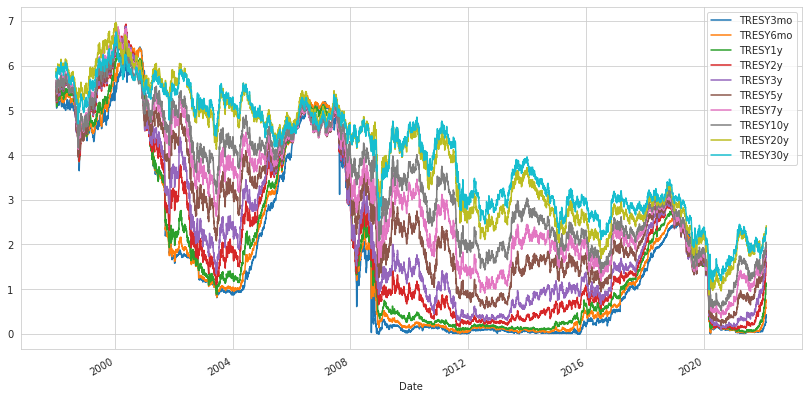

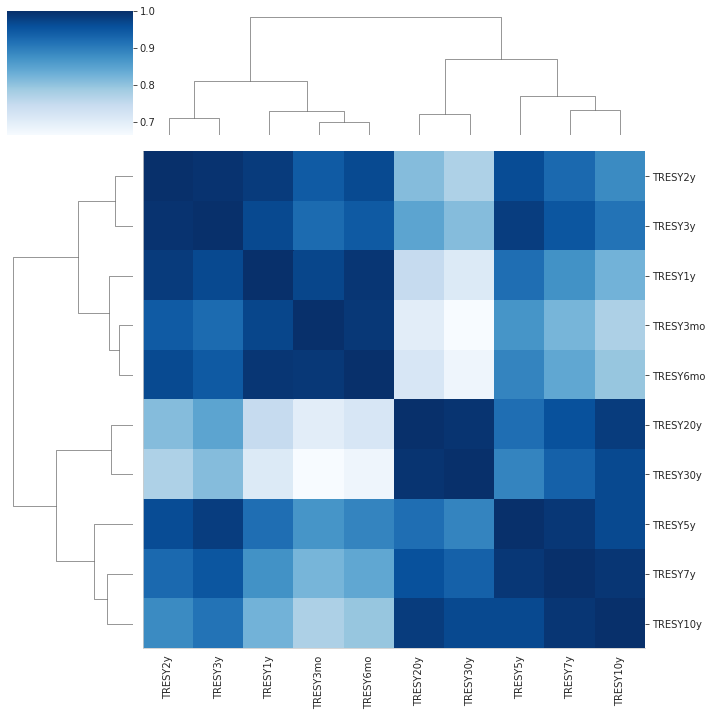

In [416]:
dataset.plot(figsize=(14,7))
sns.clustermap(dataset.corr(method='spearman'), cmap='Blues')
sns.despine()
plt.tight_layout();

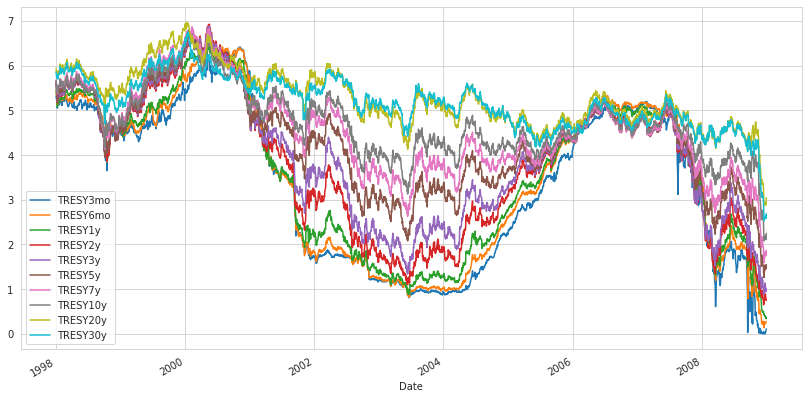

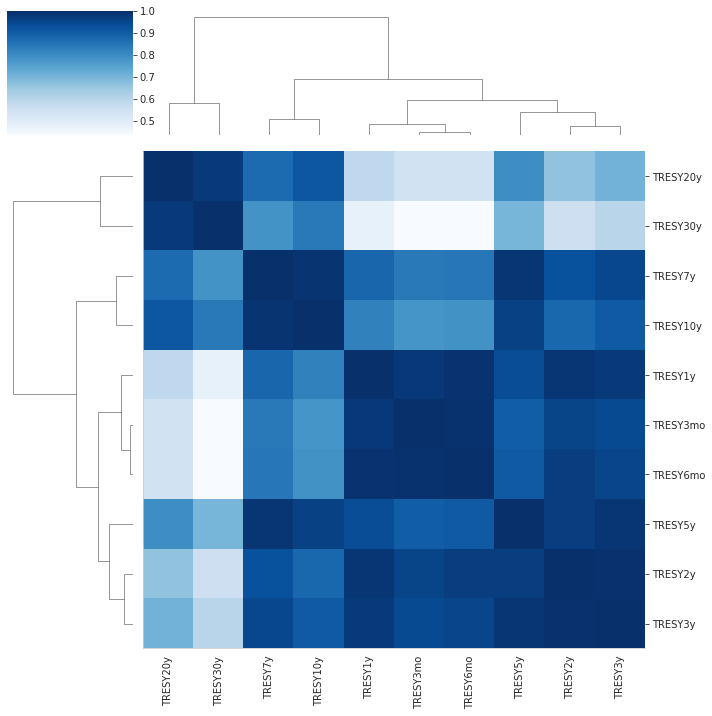

In [410]:
dataset['1998':'2008'].plot(figsize=(14,7))
sns.clustermap(dataset['1998':'2008'].corr(method='spearman'), cmap='Blues')
sns.despine()
plt.tight_layout();

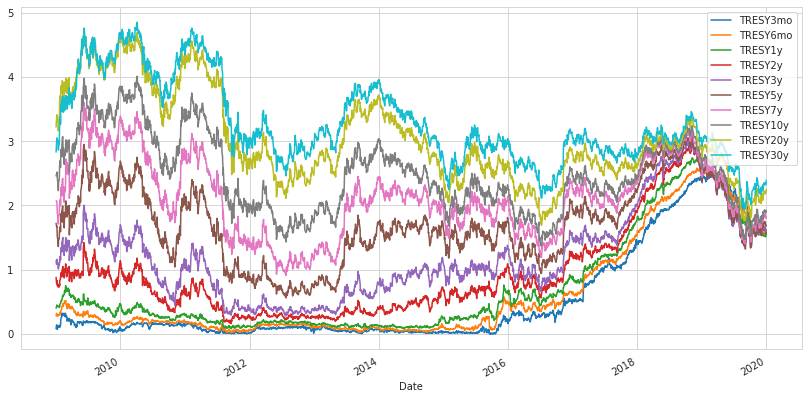

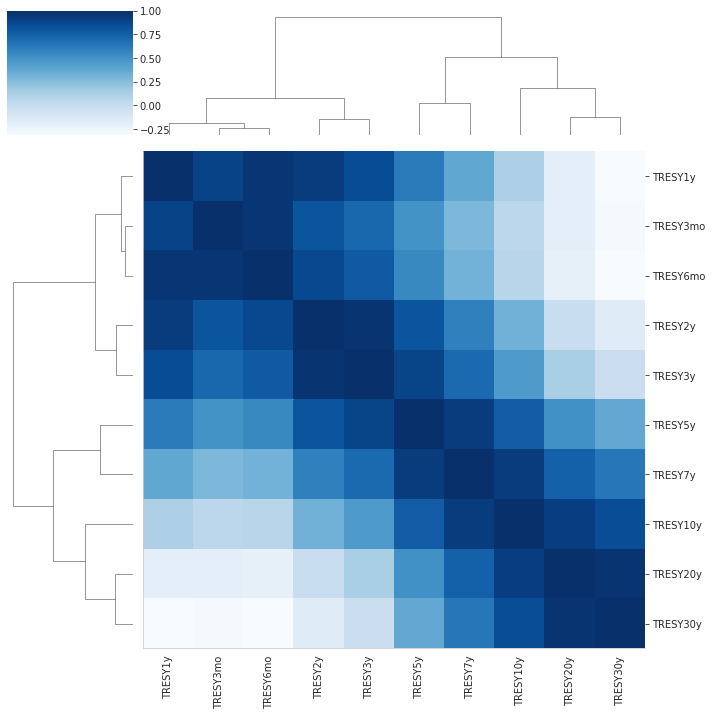

In [412]:
dataset['2009':'2019'].plot(figsize=(14,7))
sns.clustermap(dataset['2009':'2019'].corr(method='spearman'), cmap='Blues')
sns.despine()
plt.tight_layout();

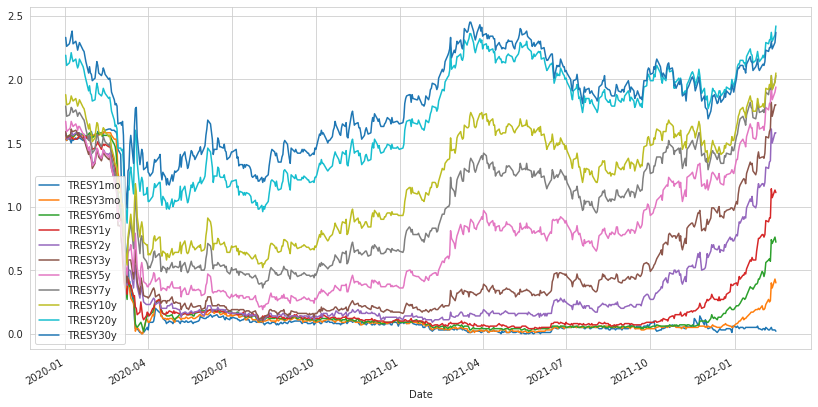

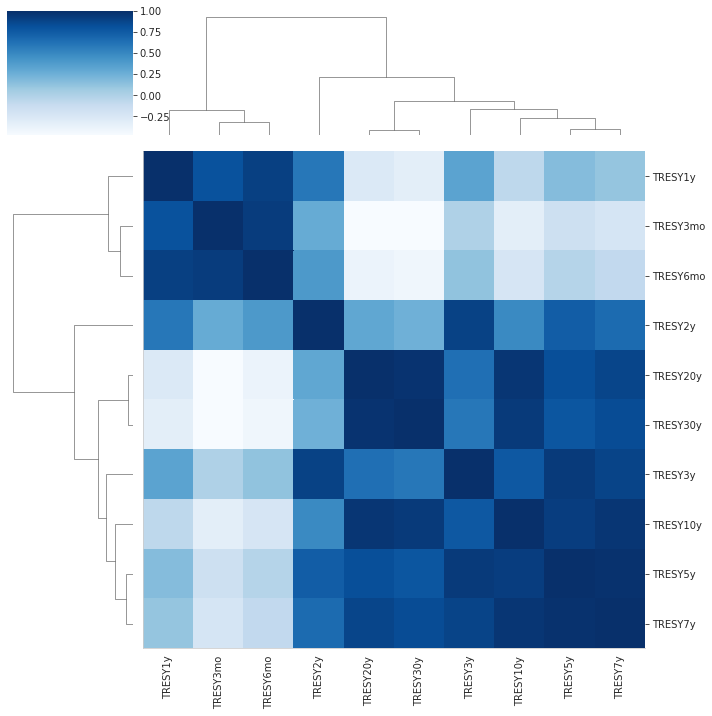

In [415]:
datasets['2020':].plot(figsize=(14,7))
sns.clustermap(dataset['2020':].corr(method='spearman'), cmap='Blues')
sns.despine()
plt.tight_layout();

## PCA

In [173]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights


In [448]:
def plot_PCA (dataset, start, end = None):

  if end is not None:
    dataset_test = dataset[start:end]

  else:
    dataset_test = dataset[start:]

  ## 스케일러
  scaler = StandardScaler().fit(dataset_test)
  dataset_sc = pd.DataFrame(scaler.fit_transform(dataset_test), columns = dataset_test.columns)
  ## PCA
  pca = PCA()
  PrincipalComponent=pca.fit(dataset_sc)  

  ## 누적 분산 보여주기
  NumEigenvalues=5
  idx = [f'PC{i}' for i in range(NumEigenvalues)]
  fig, axes = plt.subplots( figsize=(7,4))
  explained_variance_ratio = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues], index=idx)
  explained_variance_ratio.sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes)
  axes.set_xlim([0,1])
  # explained_variance_ratio.cumsum().plot(ylim=(0,1),ax=axes[1], title='Cumulative Explained Variance')
  
  
  # # explained_variance
  # pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance_Top 5').head(NumEigenvalues).style.format('{:,.2%}'.format)

  ## pca 컴포넌트의 비중 보여주기
  

  weights = pd.DataFrame()

  for i in range(len(pca.components_)):
      weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

  weights = weights.values.T
  
  NumComponents=3    
          
  topPortfolios = pd.DataFrame(weights[:NumComponents], columns=dataset.columns)
  topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

  axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,10))
  plt.subplots_adjust(hspace=0.35)
  axes[0].set_ylim(0, .2)
  plt.tight_layout()
  sns.despine()

  ##yield 커브 구조 보여주기

  fig, ax = plt.subplots(figsize=(8,5))
  pca_data = pd.DataFrame(pca.components_, 
                          index=[f'PC{i}' for i in range(pca.components_.shape[0])], 
                          columns=dataset.columns)

  pca_data.iloc[:3].T.plot(ax=ax)
  ax.set_xlabel("Principal Component")
  # plt.yticks([])
  plt.tight_layout()
  sns.despine()
  plt.show()

### 1998년 이후부터 현재

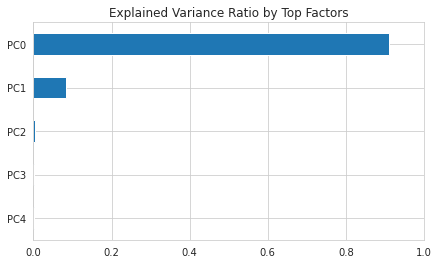

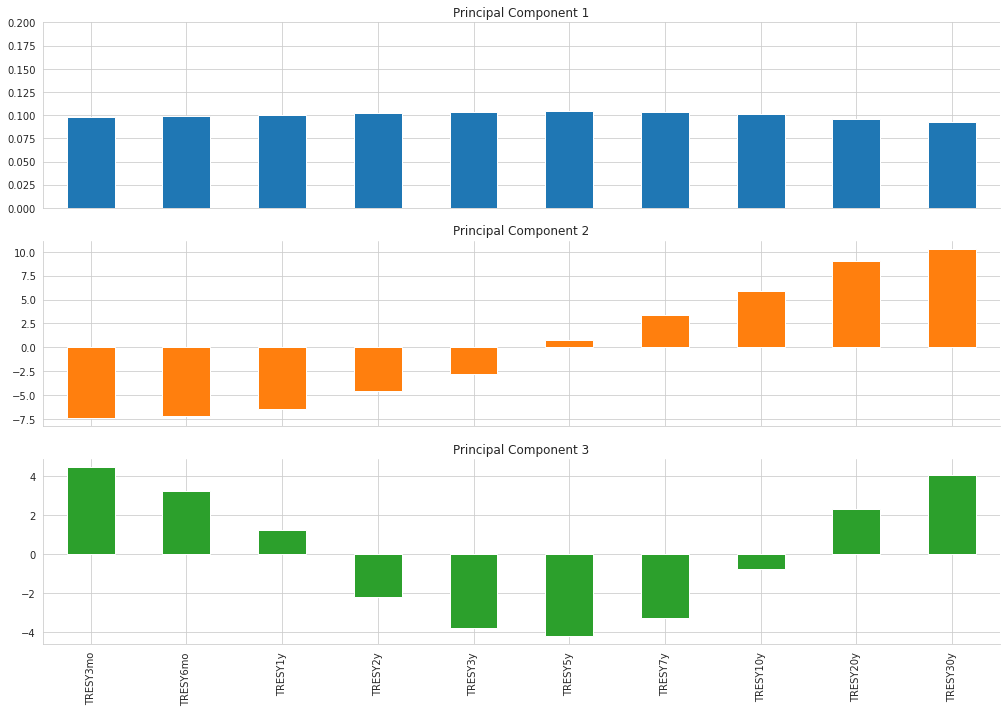

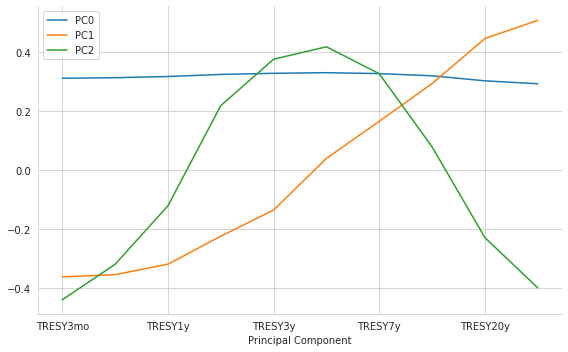

In [481]:
plot_PCA(dataset, start = '1998')

In [477]:
type(dataset)

method

### MP1: 1998년~2008년

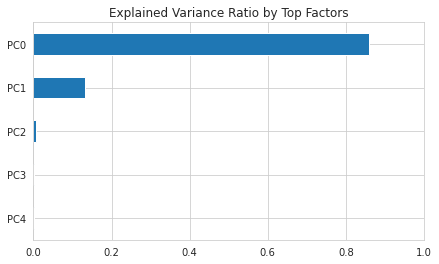

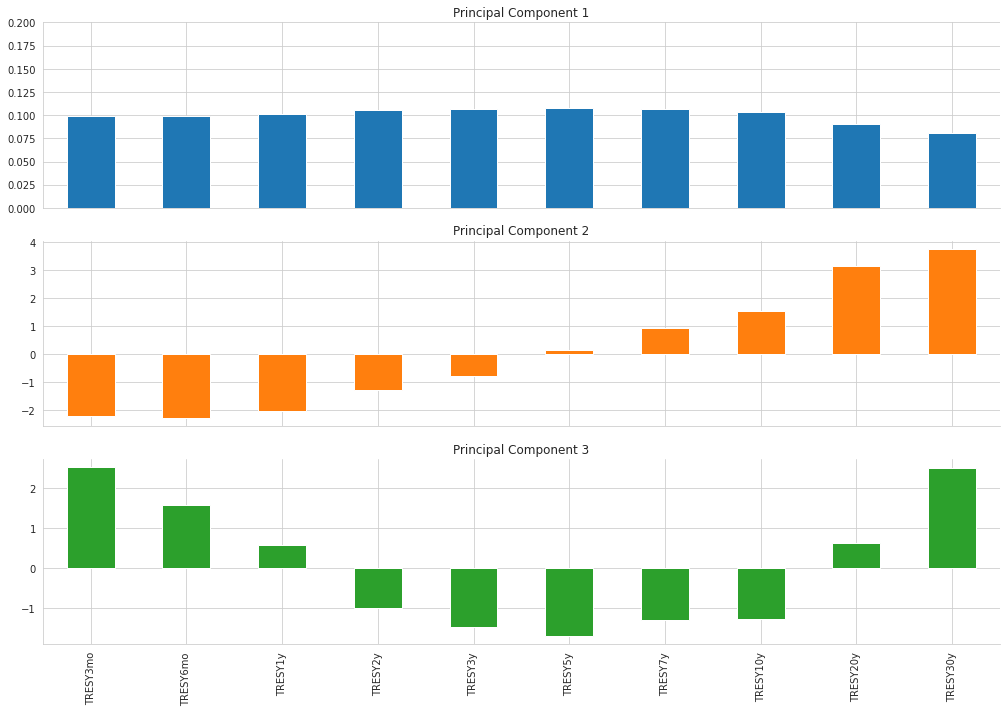

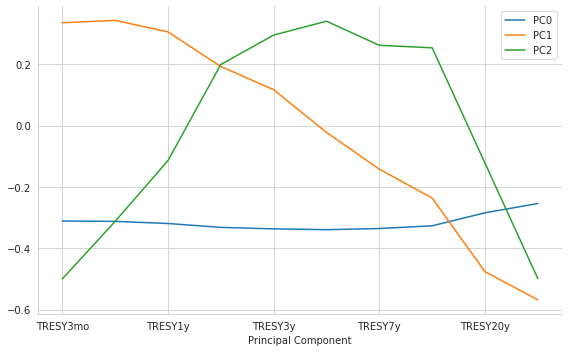

In [460]:
plot_PCA(dataset, start = '1998', end='2008')

### MP2: 2009년~2019년

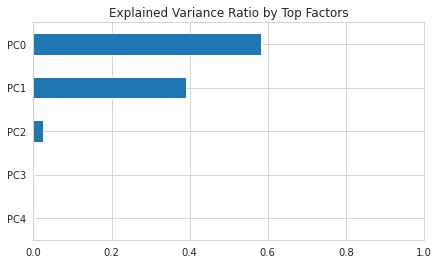

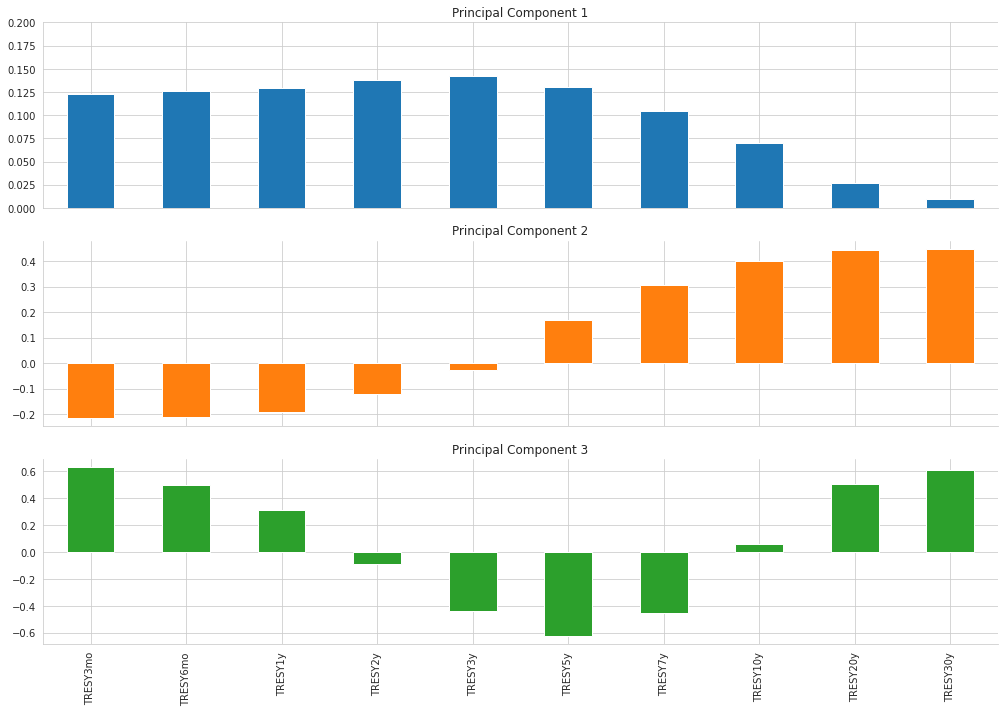

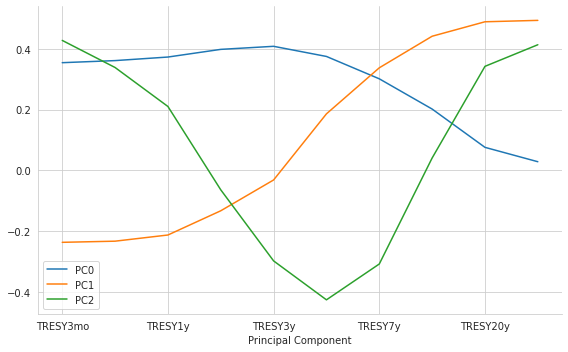

In [461]:
plot_PCA(dataset, start = '2009', end='2019')

### MP3: 2020년~

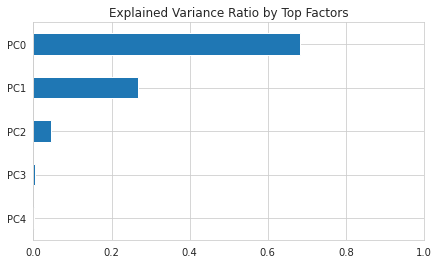

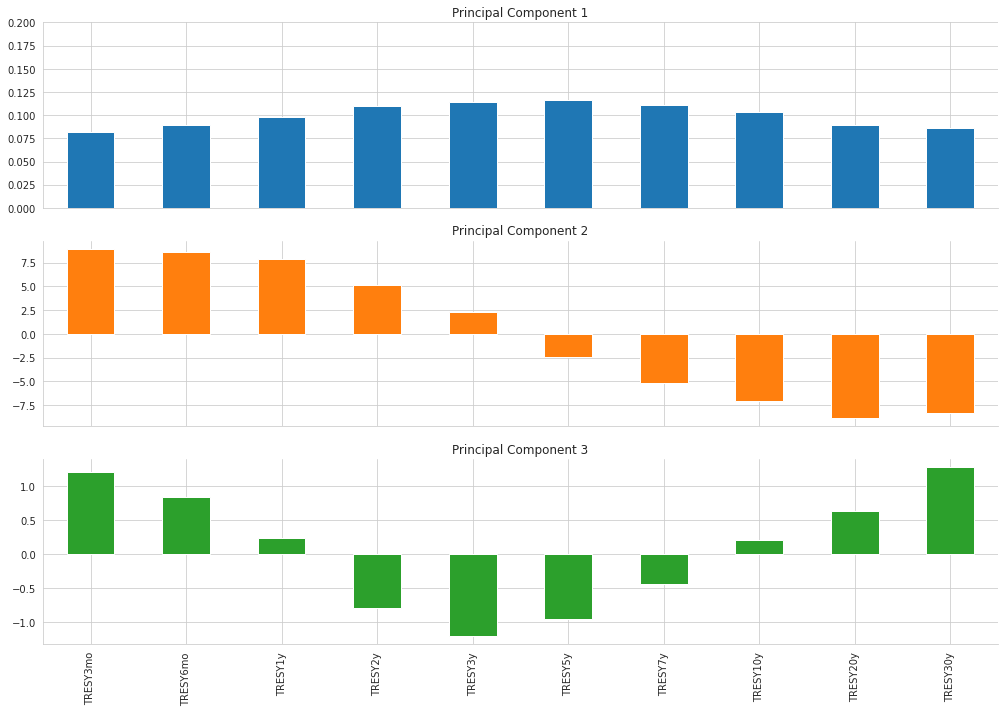

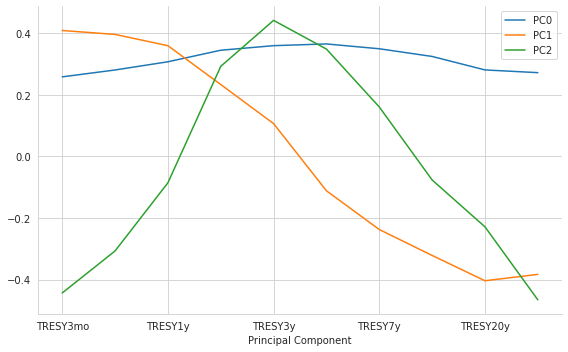

In [462]:
plot_PCA(dataset, start = '2020')

### MP3_211Q, 2021-01 ~ 2021-3

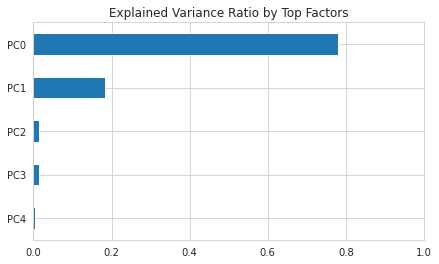

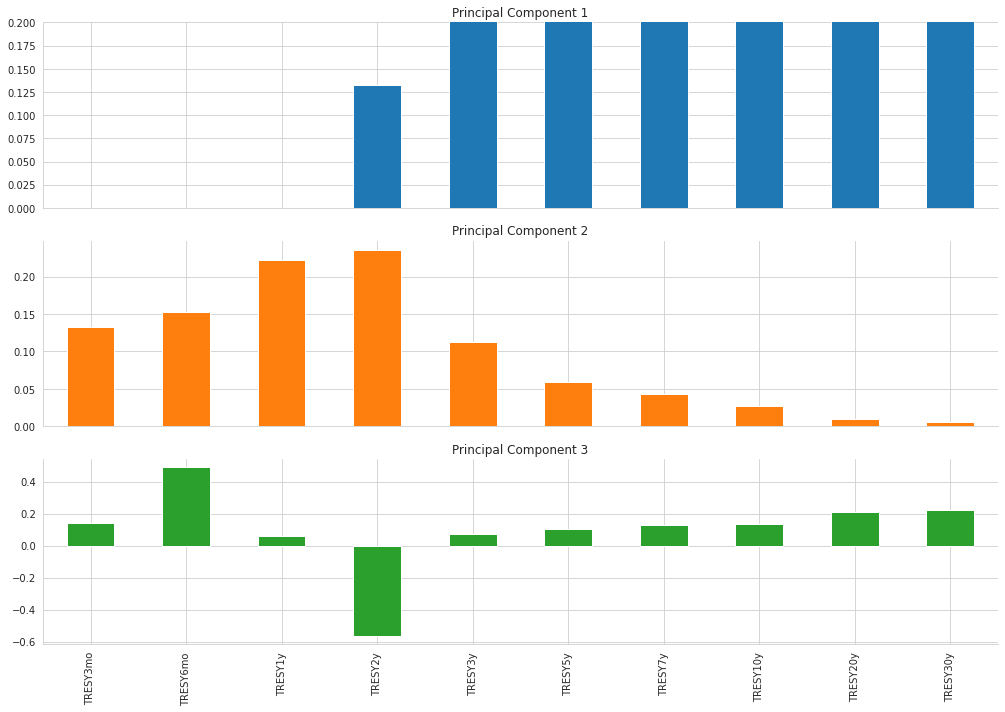

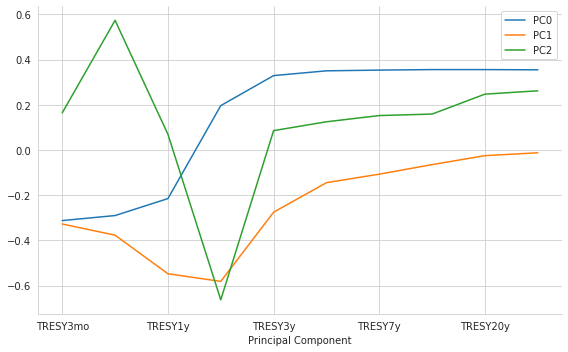

In [458]:
plot_PCA(dataset, start = '2021-01', end ='2021-03')

### MP3_212Q, 2021-04 ~ 2021-06

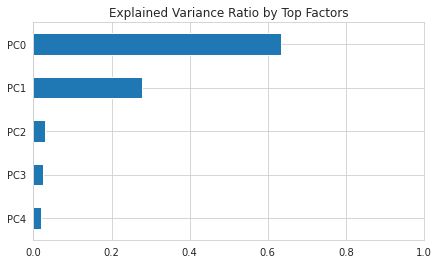

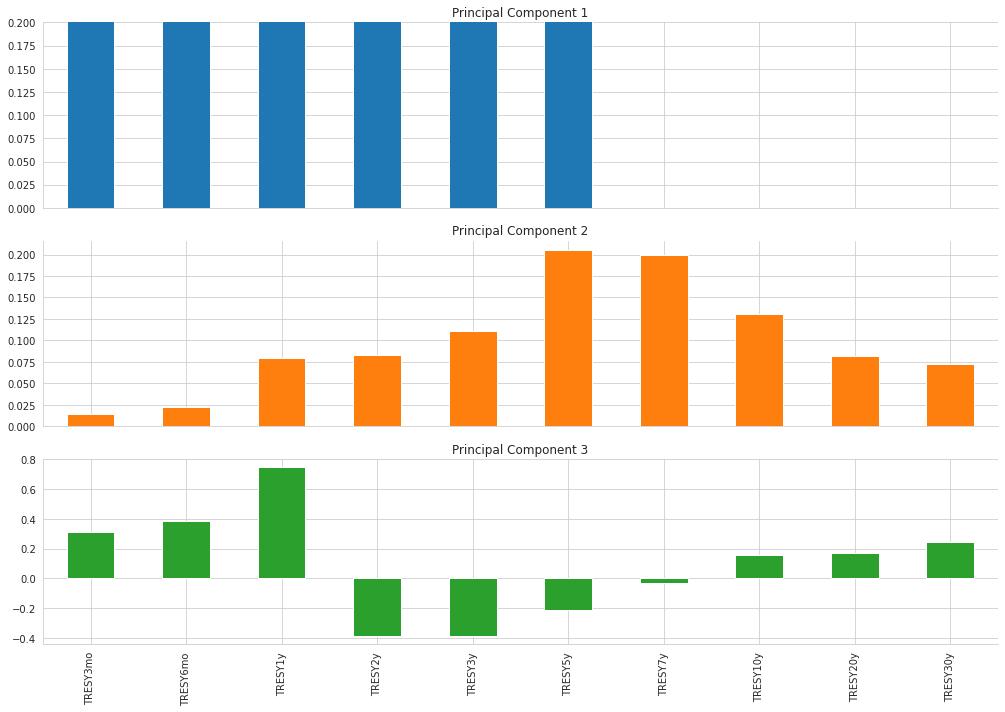

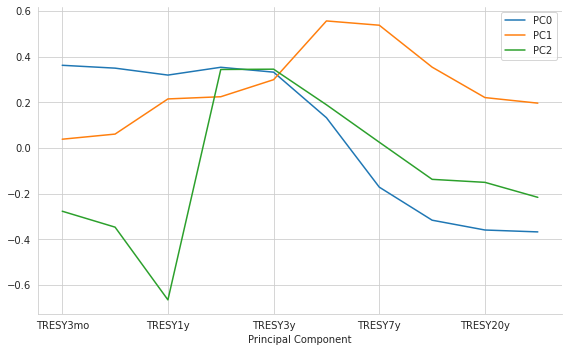

In [456]:
plot_PCA(dataset, start = '2021-04', end ='2021-06')

MP3_213Q, 2021-07 ~ 2021-09

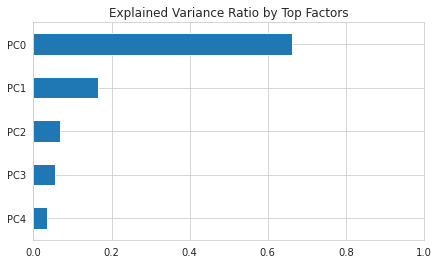

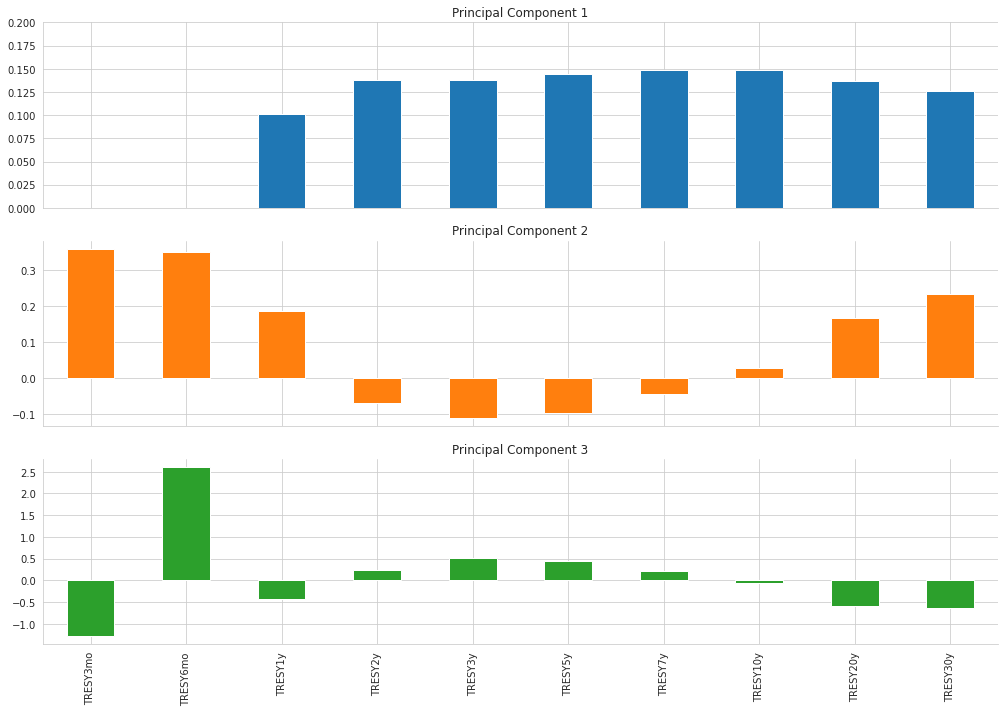

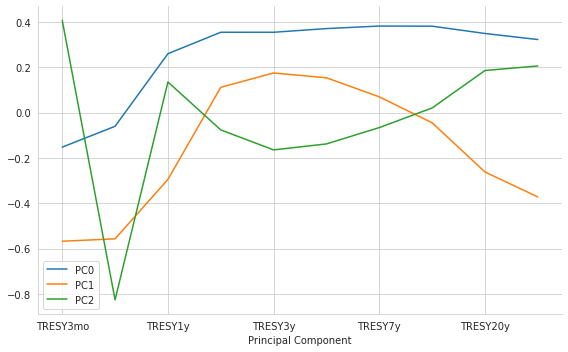

In [457]:
plot_PCA(dataset, start = '2021-07', end ='2021-09')

### MP3_214Q, 2021-10 ~ 2021-12

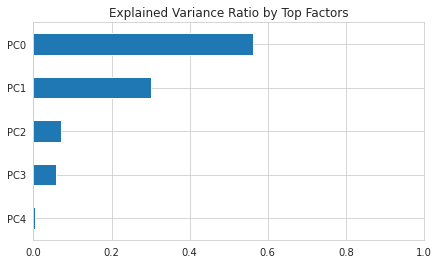

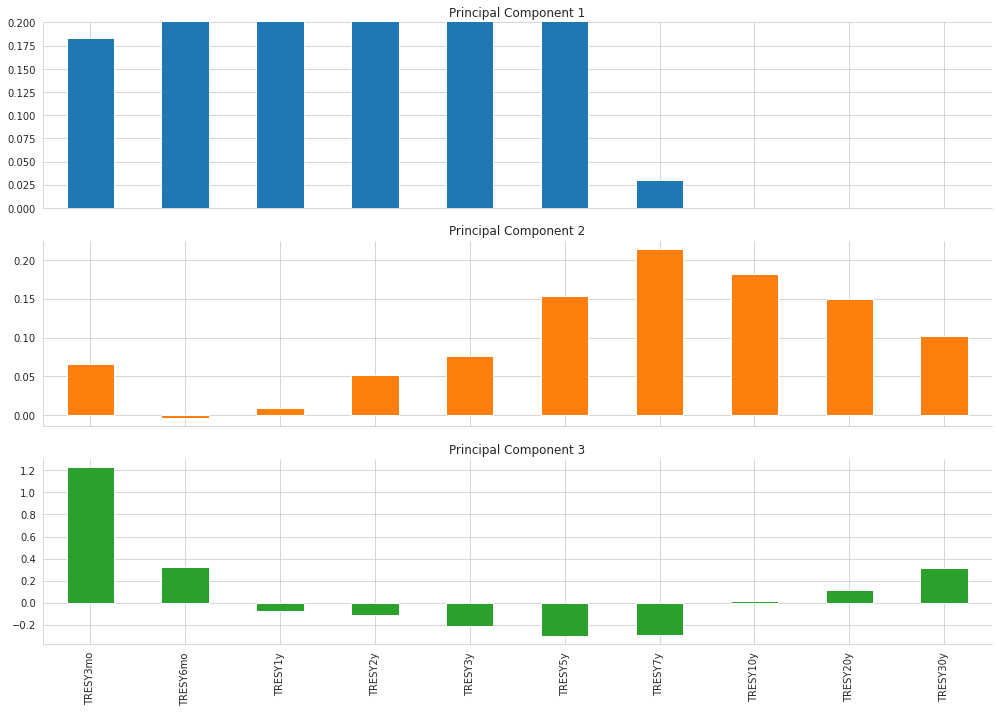

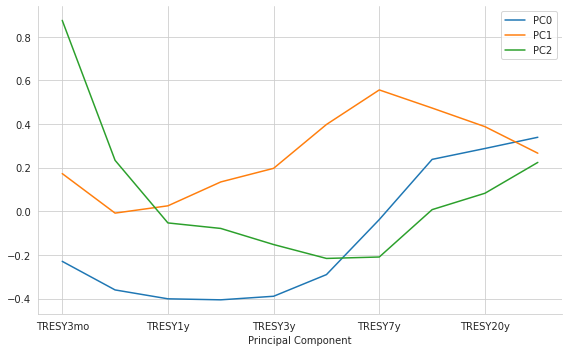

In [454]:
plot_PCA(dataset, start = '2021-10', end ='2021-12')

### MP3_22년 1Q, 2022-01 ~ 

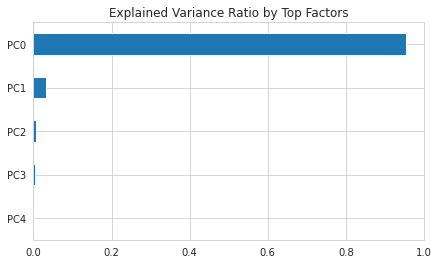

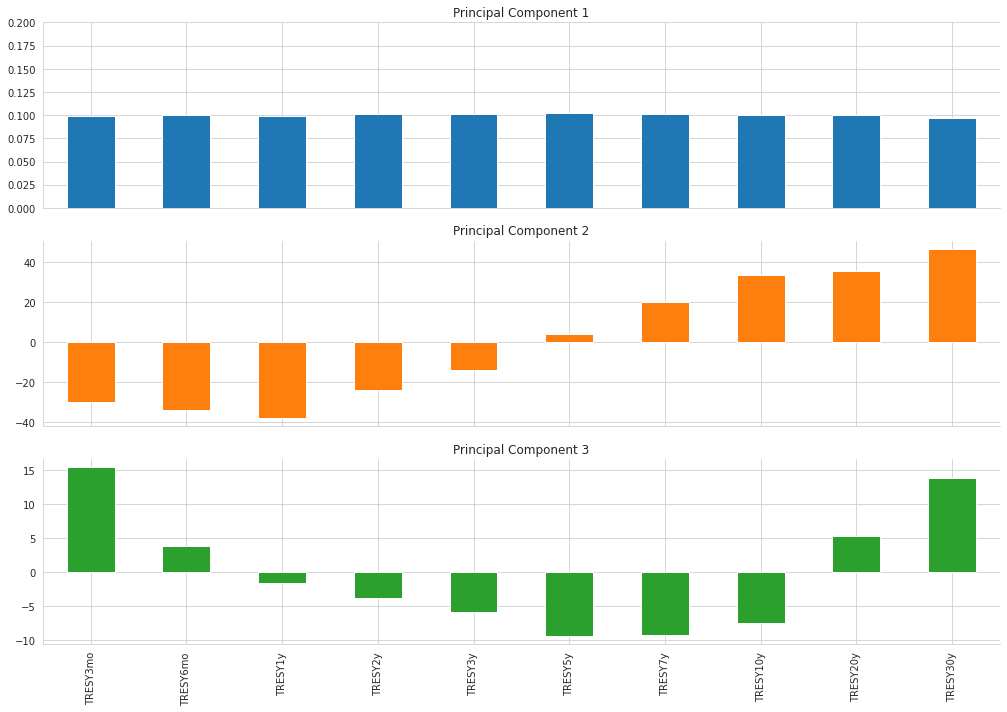

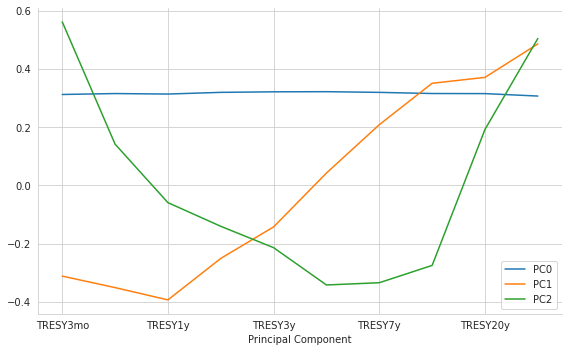

In [453]:
plot_PCA(dataset, start = '2022-01')